<a href="https://colab.research.google.com/github/ImitatedSky/module-mnist/blob/main/modules_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

from pathlib import Path
import requests
import pickle
import gzip

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Module model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        print(x.size())
        x = self.conv1(x)
        print("conv1",x.size())
        x = F.relu(x)
        x = self.conv2(x)
        print("conv2",x.size())
        x = F.max_pool2d(x, 2)
        print("pool",x.size())
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        print("flatten",x.size())
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
num_workers = 0
# how many samples per batch to load
batch_size = 30

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
trainset = datasets.MNIST(root='MNIST data', train=True,
                                   download=True, transform=transform)
testset = datasets.MNIST(root='MNIST data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
    num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
    num_workers=num_workers)

torch.Size([30, 1, 28, 28])
torch.Size([30, 1, 28, 28])
conv1 torch.Size([30, 32, 26, 26])
conv2 torch.Size([30, 64, 24, 24])
pool torch.Size([30, 64, 12, 12])
flatten torch.Size([30, 9216])
outputs0: tensor([-2.2394, -1.9846, -2.4339, -2.2478, -2.4221, -2.4793, -2.6365, -1.9314,
        -2.4428, -2.4452], grad_fn=<SelectBackward0>)
outputs4: tensor([-2.4343, -2.0371, -2.3743, -2.0859, -2.2555, -2.5276, -2.5892, -2.2209,
        -2.2411, -2.4073], grad_fn=<SelectBackward0>)
pred: tensor([7, 1, 1, 7, 1, 1, 1, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3, 7, 3, 1, 1, 3, 3, 3,
        1, 7, 7, 1, 1, 1])


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


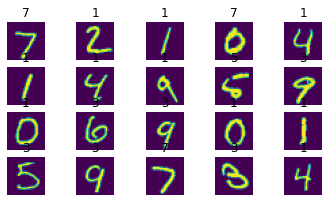

In [ ]:
from google.colab import drive

from torchvision.datasets import MNIST
import os



images,label = next(iter(testloader))
print(images.size())

model = Net()
model.eval()
#載入模型
model.load_state_dict(torch.load("drive/MyDrive/module/mnist_cnn.pt"))

outputs = model(images)
print('outputs0:',outputs[0])
print('outputs4:',outputs[4])
_,pred = torch.max(outputs,1)
print("pred:",pred.data)
n = 20
for i in range(n):
  plt.subplot(5,n/5+1,i+1) # 指定子圖繪製位置
  plt.title(pred[i].numpy()) # 顯示影像標題
  plt.imshow(images[i].reshape(28,28))
  plt.axis("off") # 設定關閉XY軸刻尺
plt.show()

<class 'PIL.Image.Image'>
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
conv1 torch.Size([1, 32, 26, 26])
conv2 torch.Size([1, 64, 24, 24])
pool torch.Size([1, 64, 12, 12])
flatten torch.Size([1, 9216])
tensor([[-2.3530, -2.1429, -2.3800, -2.1440, -2.3060, -2.4020, -2.5461, -2.2838,
         -2.1656, -2.3784]], grad_fn=<LogSoftmaxBackward0>)
tensor([1])


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


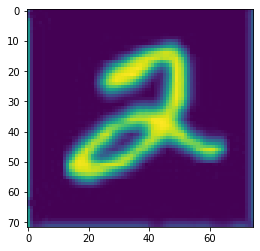

In [ ]:
from PIL import Image
img = Image.open("drive/MyDrive/module/2.jpg")
img = img.convert('L')
print(type(img))

transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
])
input = transform(img) #torch.Size([ 1, 28, 28])
input = input.unsqueeze_(0) #torch.Size([1, 1, 28, 28])

model.eval()
print(input.size())
output = model(input)
_,pred = torch.max(output,1)
print(output)
print(pred)
plt.imshow(img)

<class 'PIL.Image.Image'>
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
conv1 torch.Size([1, 32, 26, 26])
conv2 torch.Size([1, 64, 24, 24])
pool torch.Size([1, 64, 12, 12])
flatten torch.Size([1, 9216])
tensor([[-2.3337, -2.1510, -2.3890, -2.1641, -2.3189, -2.3740, -2.5411, -2.2959,
         -2.1540, -2.3734]], grad_fn=<LogSoftmaxBackward0>)
pred number: [1]


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


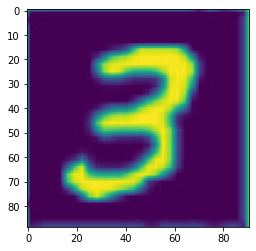

In [ ]:
img = Image.open("drive/MyDrive/module/3.jpg")
img = img.convert('L')
print(type(img))

transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
])
input = transform(img) #torch.Size([ 1, 28, 28])
input = input.unsqueeze_(0) #torch.Size([1, 1, 28, 28])

model.eval()
print(input.size())
output = model(input)
_,pred = torch.max(output,1)
print(output)
print('pred number:',pred.numpy())
plt.imshow(img)